In [110]:
# Step 1:  Set the Working Directory  
%cd C:\Users\ANIK\Downloads

C:\Users\ANIK\Downloads


In [111]:
import warnings
warnings.filterwarnings('ignore')

In [112]:
# Step 2:  Import the required libraries, etc  
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
import pandas as pd
from pandas import DataFrame

In [113]:
# Step 3:  Load the data into a Python dataset
vendors = pd.read_csv("E_Commerce Vendors Rating.csv", sep=",")
vendors.head()

,VendorID,ProductQuality,SpeedofDelivery,CompetitivePricing,ComplaintResolution,ProductLine,NumberofComplaints,Response
0,2,0.641791,0.418182,0.028,0.598039,0.323008,0.076923,Certified
1,5,0.059701,0.400000,0.000,0.188406,0.272288,0.076923,NOTCertified
2,6,0.029851,0.254545,0.030,0.304348,0.428780,0.076923,NOTCertified
3,7,0.164179,0.327273,0.042,0.420290,0.352438,0.487179,Restricted
4,8,0.417910,0.345455,0.027,0.463768,0.424046,0.230769,NOTCertified


In [114]:
# Step 4:  Remove the variable 'VendorID' from the Python dataset
vendors = vendors [['ProductQuality', 'SpeedofDelivery', 'CompetitivePricing', 'ComplaintResolution', 'ProductLine', 'NumberofComplaints', 'Response']]
vendors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Data columns (total 7 columns):
ProductQuality         59381 non-null float64
SpeedofDelivery        59381 non-null float64
CompetitivePricing     59381 non-null float64
ComplaintResolution    59381 non-null float64
ProductLine            59381 non-null float64
NumberofComplaints     59381 non-null float64
Response               59381 non-null object
dtypes: float64(6), object(1)
memory usage: 3.2+ MB


Text(0.5,1,'Product Quality -  by Response')

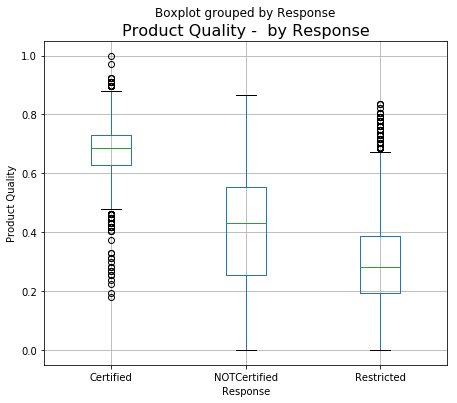

In [115]:
# Step 5:  Visualize the data through Box Plots for each of the Predictors, grouped by the various classes of the Target  
# Step 5a:  Draw a Box Plot for the Predictor 'ProductQuality' against the various classes of the Target  
fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot (1,1,1)
vendors.boxplot ('ProductQuality', by='Response', ax=ax)
ax.set_xlabel ('Response')
ax.set_ylabel ('Product Quality')
ax.set_title ('Product Quality -  by Response', fontsize='16')

Text(0.5,1,'Speed of Delivery -  by Response')

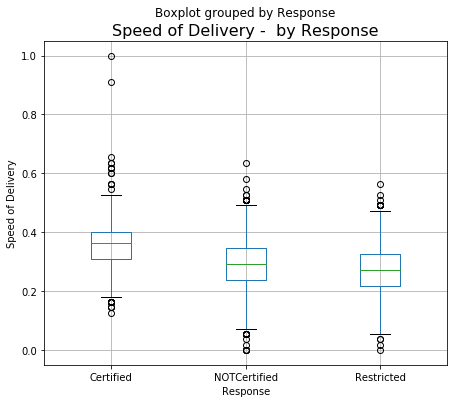

In [116]:
# Step 5b:  Draw a Box Plot for the Predictor 'SpeedofDelivery' against the various classes of the Target
fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot (1,1,1)
vendors.boxplot ('SpeedofDelivery', by='Response', ax=ax)
ax.set_xlabel ('Response')
ax.set_ylabel ('Speed of Delivery')
ax.set_title ('Speed of Delivery -  by Response', fontsize='16')

Text(0.5,1,'Competitive Pricing -  by Response')

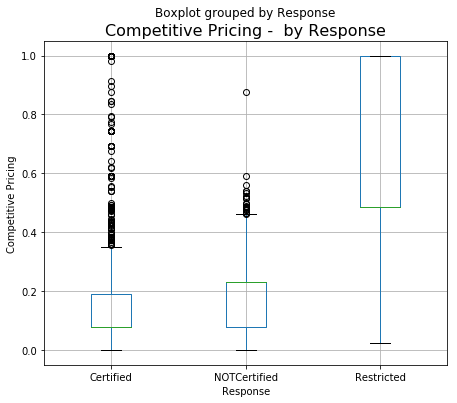

In [117]:
# Step 5c:  Draw a Box Plot for the Predictor 'CompetitivePricing' against the various classes of the Target  
fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot (1,1,1)
vendors.boxplot ('CompetitivePricing', by='Response', ax=ax)
ax.set_xlabel ('Response')
ax.set_ylabel ('Competitive Pricing')
ax.set_title ('Competitive Pricing -  by Response', fontsize='16')

Text(0.5,1,'Complaint Resolution -  by Response')

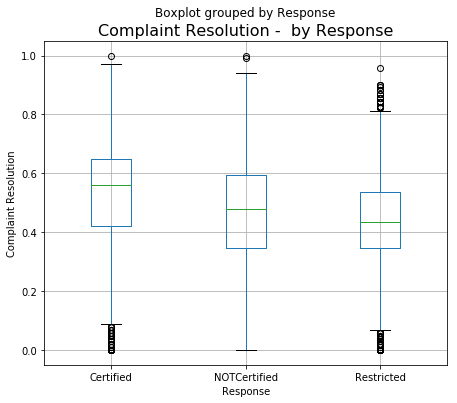

In [118]:
# Step 5d:  Draw a Box Plot for the Predictor 'ComplaintResolution' against the various classes of the Target  
fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot (1,1,1)
vendors.boxplot ('ComplaintResolution', by='Response', ax=ax)
ax.set_xlabel ('Response')
ax.set_ylabel ('Complaint Resolution')
ax.set_title ('Complaint Resolution -  by Response', fontsize='16')

Text(0.5,1,'Product Line -  by Response')

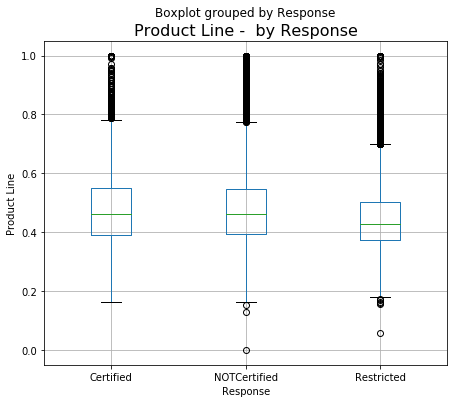

In [119]:
# Step 5e:  Draw a Box Plot for the Predictor 'ProductLine' against the various classes of the Target  
fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot (1,1,1)
vendors.boxplot ('ProductLine', by='Response', ax=ax)
ax.set_xlabel ('Response')
ax.set_ylabel ('Product Line')
ax.set_title ('Product Line -  by Response', fontsize='16')

Text(0.5,1,'Number of Complaints -  by Response')

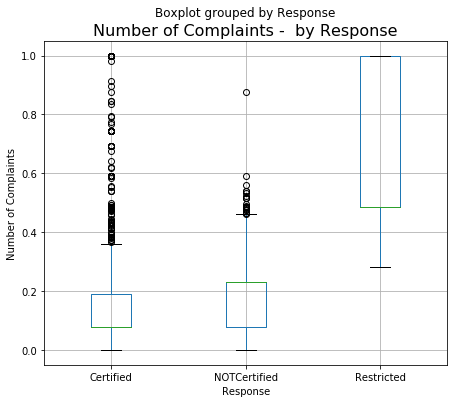

In [120]:
# Step 5f:  Draw a Box Plot for the Predictor 'NumberofComplaints' against the various classes of the Target  
fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot (1,1,1)
vendors.boxplot ('NumberofComplaints', by='Response', ax=ax)
ax.set_xlabel ('Response')
ax.set_ylabel ('Number of Complaints')
ax.set_title ('Number of Complaints -  by Response', fontsize='16')


In [121]:
# Step 6:  Select the Predictors to be used for building the (Linear) Discriminant Analysis model  
# Step 6a:  Explore the distribution of the samples, grouped by the various classes of the Target  

mix = vendors [['Response']].groupby (vendors ['Response']).count()
mix.to_csv ("Vendors (2 Category)_Target Mix.csv")
print('Group Counts:')
print (mix)
print ('')

Group Counts:
              Response
Response              
Certified         6906
NOTCertified     35009
Restricted       17466



In [122]:
# Step 6b:  Examine the average values for each of the Predictors, grouped by the various classes of the Target  

centroids = vendors.groupby (vendors ['Response']).mean()
centroids = centroids.T
centroids.to_csv ("Vendors (2 Category)_Feature Centroids.csv")
print ('Group Centroids:')
print (centroids)
print ('')


Group Centroids:
Response             Certified  NOTCertified  Restricted
ProductQuality        0.676816      0.405143    0.299165
SpeedofDelivery       0.353429      0.286941    0.280288
CompetitivePricing    0.137791      0.187276    0.686547
ComplaintResolution   0.510717      0.456656    0.433963
ProductLine           0.479918      0.479141    0.445928
NumberofComplaints    0.137981      0.187574    0.687840



In [123]:
# Step 6c:  Examine the variation in the data w.r.t. each of the Predictors, grouped by the various classes of the Target  

all_predictors = ['ProductQuality', 'SpeedofDelivery', 'CompetitivePricing', 'ComplaintResolution', 'ProductLine', 'NumberofComplaints']
formulae = ['ProductQuality ~ Response', 'SpeedofDelivery ~ Response', 'CompetitivePricing ~ Response', 'ComplaintResolution ~ Response', 'ProductLine ~ Response', 'NumberofComplaints ~ Response']
anova_betweenss = np.zeros(6)
anova_withinss = np.zeros(6)
anova_totalss = np.zeros(6)
anova_omega_square = np.zeros(6)
for i in np.arange(6):
    model = smf.ols (formulae [i], data=vendors)
    results = model.fit()
    anova_betweenss [i] = results.ess
    anova_withinss [i] = results.ssr
    anova_totalss [i] = results.centered_tss
    anova_omega_square [i] = (1 - anova_withinss [i] / anova_totalss [i]) * 100

omega_square_table = DataFrame()
omega_square_table ['Predictor'] = all_predictors
omega_square_table ['Between SS'] = anova_betweenss
omega_square_table ['Within SS'] = anova_withinss
omega_square_table ['Total SS'] = anova_totalss
omega_square_table ['Omega square (%)'] = anova_omega_square
omega_square_table.to_csv ("Vendors (2 Category)_Predictor Omega-squares.csv")
print ('Predictor Omega squares:')
print (omega_square_table)
print ('')


Predictor Omega squares:
             Predictor   Between SS    Within SS     Total SS  \
0       ProductQuality   705.858971  1603.072740  2308.931711   
1      SpeedofDelivery    29.321328   297.946438   327.267765   
2   CompetitivePricing  3188.490700  1552.058178  4740.548878   
3  ComplaintResolution    29.169351  1988.096035  2017.265386   
4          ProductLine    13.708205   873.191478   886.899683   
5   NumberofComplaints  3201.238646  1539.739257  4740.977903   

   Omega square (%)  
0         30.570803  
1          8.959430  
2         67.259948  
3          1.445985  
4          1.545632  
5         67.522750  



In [124]:
# Step 6d:  Display the pertinent characteristics of the data, in order to select the Predictors  

print ('Group Counts:')
print (mix)
print ('')
print ('Group Centroids:')
print (centroids)
print ('')
print ('Predictor Omega squares:')
print (omega_square_table)
print ('')

Group Counts:
              Response
Response              
Certified         6906
NOTCertified     35009
Restricted       17466

Group Centroids:
Response             Certified  NOTCertified  Restricted
ProductQuality        0.676816      0.405143    0.299165
SpeedofDelivery       0.353429      0.286941    0.280288
CompetitivePricing    0.137791      0.187276    0.686547
ComplaintResolution   0.510717      0.456656    0.433963
ProductLine           0.479918      0.479141    0.445928
NumberofComplaints    0.137981      0.187574    0.687840

Predictor Omega squares:
             Predictor   Between SS    Within SS     Total SS  \
0       ProductQuality   705.858971  1603.072740  2308.931711   
1      SpeedofDelivery    29.321328   297.946438   327.267765   
2   CompetitivePricing  3188.490700  1552.058178  4740.548878   
3  ComplaintResolution    29.169351  1988.096035  2017.265386   
4          ProductLine    13.708205   873.191478   886.899683   
5   NumberofComplaints  3201.238646  1

In [125]:
# Step 7:  Prepare the data to be used for building the (Linear) Discriminant Analysis model  
# Step 7a:  Specify the Features (i.e., the Predictors) to be used for building the model  

predictors = ['ProductQuality', 'SpeedofDelivery', 'CompetitivePricing', 'NumberofComplaints']

In [126]:
# Step 7b:  Specify the various classes of the Target variable  

groups = ['NOTCertified', 'Certified','Restricted']

In [127]:
# Step 7c:  Encode the various classes of the Target variable  

vendors ['ResponseCode'] = np.zeros(vendors ['Response'].count())
vendors ['ResponseCode'] [vendors ['Response'] == 'Certified'] = 1
vendors ['ResponseCode'] [vendors ['Response'] == 'Restricted'] = 2
vendors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Data columns (total 8 columns):
ProductQuality         59381 non-null float64
SpeedofDelivery        59381 non-null float64
CompetitivePricing     59381 non-null float64
ComplaintResolution    59381 non-null float64
ProductLine            59381 non-null float64
NumberofComplaints     59381 non-null float64
Response               59381 non-null object
ResponseCode           59381 non-null float64
dtypes: float64(7), object(1)
memory usage: 3.6+ MB


In [128]:
vendors.head()

,ProductQuality,SpeedofDelivery,CompetitivePricing,ComplaintResolution,ProductLine,NumberofComplaints,Response,ResponseCode
0,0.641791,0.418182,0.028,0.598039,0.323008,0.076923,Certified,1.0
1,0.059701,0.400000,0.000,0.188406,0.272288,0.076923,NOTCertified,0.0
2,0.029851,0.254545,0.030,0.304348,0.428780,0.076923,NOTCertified,0.0
3,0.164179,0.327273,0.042,0.420290,0.352438,0.487179,Restricted,2.0
4,0.417910,0.345455,0.027,0.463768,0.424046,0.230769,NOTCertified,0.0


In [129]:
# Step 7d:  Create separate arrays for the Predictor variables and the Target variable  

X = np.array(vendors [predictors])
y = np.array(vendors [['ResponseCode']])
y = y.ravel()

In [130]:
# Step 8:  Build the (Linear) Discriminant Analysis model  

classifier = lda()
model = classifier.fit (X, y)

In [131]:
# Step 9:  Explore the various facets of the (Linear) Discriminant Analysis model  
# Step 9a:  Explore the Prior Probabilities (i.e., the distribution of the samples), grouped by the various classes of the Target  

PriorProbabilities = DataFrame()
PriorProbabilities ['Response'] = groups
PriorProbabilities ['Prior Probabilities'] = 100*model.priors_ 
PriorProbabilities.to_csv ("Vendors (2 Category)_Prior Probabilities.csv")
print ('Prior Probabilities of Groups:')
print (PriorProbabilities)
print ('')


Prior Probabilities of Groups:
       Response  Prior Probabilities
0  NOTCertified            58.956569
1     Certified            11.629983
2    Restricted            29.413449



In [132]:
# Step 9b:  Explore the Group Means (i.e., the average values for each of the Predictors), grouped by the various classes of the Target  

GroupMeans = DataFrame()
GroupMeans ['Predictor'] = predictors
GroupMeans ['Restricted'] = model.means_.T [:,2]
GroupMeans ['Certified'] = model.means_.T [:,1]
GroupMeans ['NOT Certified'] = model.means_.T [:,0]
GroupMeans.to_csv ("Vendors (2 Category)_Group Means.csv")
print ('Group Means:')
print (GroupMeans)
print ('')

Group Means:
            Predictor  Restricted  Certified  NOT Certified
0      ProductQuality    0.299165   0.676816       0.405143
1     SpeedofDelivery    0.280288   0.353429       0.286941
2  CompetitivePricing    0.686547   0.137791       0.187276
3  NumberofComplaints    0.687840   0.137981       0.187574



In [133]:
# Step 9c:  Explore the (Linear) Discriminant Function, through the Discriminant Loadings against each of the Predictors  

DiscriminantLoadings = DataFrame()
DiscriminantLoadings ['Predictor'] = predictors
DiscriminantLoadings ['LD 1'] = ''
DiscriminantLoadings ['LD 1'] = model.scalings_
DiscriminantLoadings ['LD 2'] = ''
DiscriminantLoadings ['LD 2'] = model.scalings_[:,1]
DiscriminantLoadings.to_csv ("Vendors (2 Cat)_Discriminant Loadings.csv")
print ('Discriminant Loadings:')
print (DiscriminantLoadings)
print ('')


Discriminant Loadings:
            Predictor      LD 1      LD 2
0      ProductQuality -2.762041 -4.855261
1     SpeedofDelivery -1.997834 -9.038609
2  CompetitivePricing -0.219073 -0.033687
3  NumberofComplaints  6.002272 -2.291676



In [134]:
# Step 9d:  Display the various facets of the (Linear) Discriminant Analysis model  

print ('(Linear) Discriminant Analysis model')
print ('*******************************************')
print ('Prior Probabilities of Groups:')
print (PriorProbabilities)
print ('')
print ('Group Means:')
print (GroupMeans)
print ('')
print ('Discriminant Loadings:')
print (DiscriminantLoadings)
print ('')

(Linear) Discriminant Analysis model
*******************************************
Prior Probabilities of Groups:
       Response  Prior Probabilities
0  NOTCertified            58.956569
1     Certified            11.629983
2    Restricted            29.413449

Group Means:
            Predictor  Restricted  Certified  NOT Certified
0      ProductQuality    0.299165   0.676816       0.405143
1     SpeedofDelivery    0.280288   0.353429       0.286941
2  CompetitivePricing    0.686547   0.137791       0.187276
3  NumberofComplaints    0.687840   0.137981       0.187574

Discriminant Loadings:
            Predictor      LD 1      LD 2
0      ProductQuality -2.762041 -4.855261
1     SpeedofDelivery -1.997834 -9.038609
2  CompetitivePricing -0.219073 -0.033687
3  NumberofComplaints  6.002272 -2.291676



In [135]:
# Step 10:  Examine the "discrimination" effected by the (Linear) Discriminant Analysis model  
# Step 10a:  Determine the Discriminant Scores for each of the samples in the data  

vendors ['DiscScore1'] = ''
vendors ['DiscScore1'] = model.transform (X)
vendors ['DiscScore2'] = ''
vendors ['DiscScore2'] = model.transform (X)[:,1]
vendors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Data columns (total 10 columns):
ProductQuality         59381 non-null float64
SpeedofDelivery        59381 non-null float64
CompetitivePricing     59381 non-null float64
ComplaintResolution    59381 non-null float64
ProductLine            59381 non-null float64
NumberofComplaints     59381 non-null float64
Response               59381 non-null object
ResponseCode           59381 non-null float64
DiscScore1             59381 non-null float64
DiscScore2             59381 non-null float64
dtypes: float64(9), object(1)
memory usage: 4.5+ MB


Text(0.5,1,'1st Discriminant Scores -  by Response')

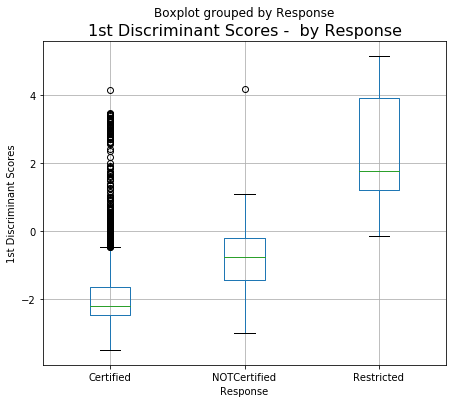

In [136]:
# Step 10b:  Visualize the averages of the Discriminant Scores through Box Plots, grouped by the various classes of the Target  

fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot (1,1,1)
vendors.boxplot ('DiscScore1', by='Response', ax=ax)
ax.set_xlabel ('Response')
ax.set_ylabel ('1st Discriminant Scores')
ax.set_title ('1st Discriminant Scores -  by Response', fontsize='16')

Text(0.5,1,'2nd Discriminant Scores -  by Response')

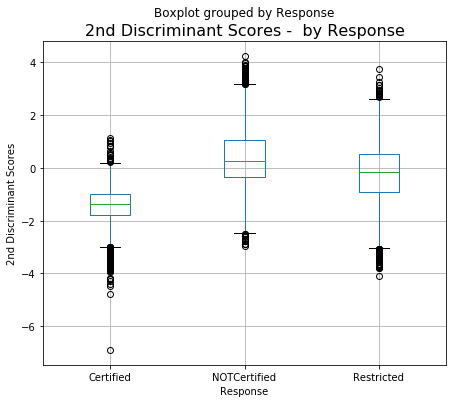

In [137]:
fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot (1,1,1)
vendors.boxplot ('DiscScore2', by='Response', ax=ax)
ax.set_xlabel ('Response')
ax.set_ylabel ('2nd Discriminant Scores')
ax.set_title ('2nd Discriminant Scores -  by Response', fontsize='16')

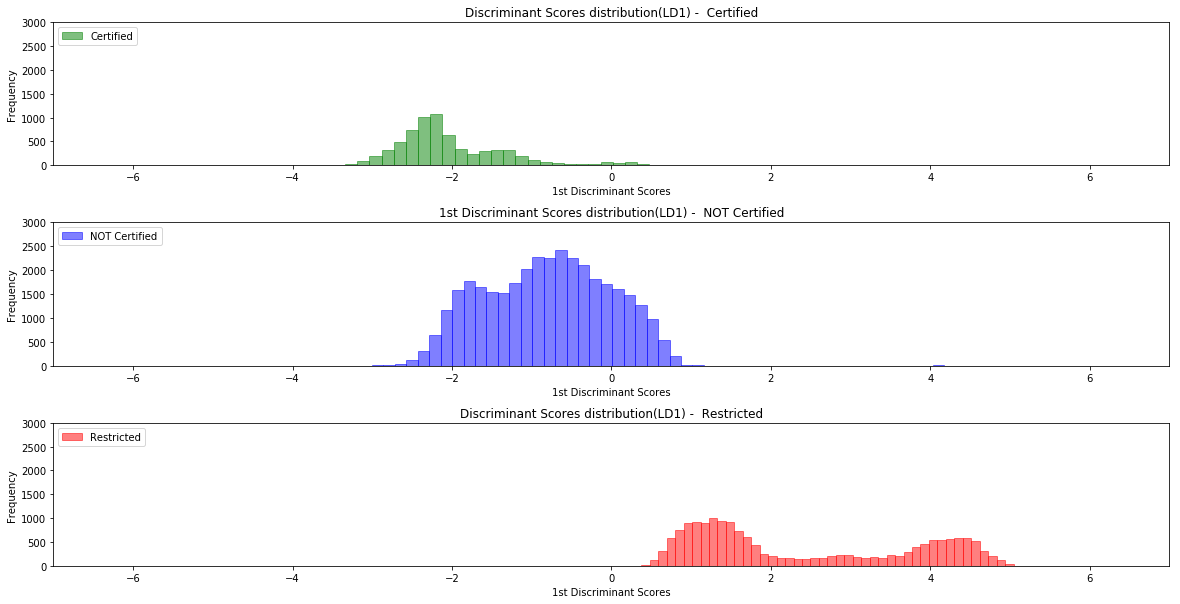

In [138]:
# Step 10c:  Visualize the distribution of Discriminant Scores of the D1 function across the data, through Histograms for the various classes of the Target  

fig = plt.figure(figsize=(20,10))
fig.subplots_adjust (hspace=0.4)

ax = fig.add_subplot (3, 1, 1)
ax.hist (np.array (vendors ['DiscScore1'] [vendors ['ResponseCode'] == 1]), bins=50, color='g',  edgecolor ='g',alpha=0.5, label='Certified')
ax.set_xlabel ('1st Discriminant Scores')
ax.set_ylabel ('Frequency')
ax.set_xlim (-7, 7)
ax.set_ylim (0, 3000)
ax.set_title ('Discriminant Scores distribution(LD1) -  Certified')
ax.legend (loc='upper left')

ax = fig.add_subplot (3, 1, 2)
ax.hist (np.array (vendors ['DiscScore1'] [vendors ['ResponseCode'] == 0]), bins=50, color='b', edgecolor ='b', alpha=0.5, label='NOT Certified')
ax.set_xlabel ('1st Discriminant Scores')
ax.set_ylabel ('Frequency')
ax.set_xlim (-7, 7)
ax.set_ylim (0, 3000)
ax.set_title ('1st Discriminant Scores distribution(LD1) -  NOT Certified')
ax.legend (loc='upper left')

ax = fig.add_subplot (3, 1, 3)
ax.hist (np.array (vendors ['DiscScore1'] [vendors ['ResponseCode'] == 2]), bins=50, color='r', edgecolor ='r', alpha=0.5, label='Restricted')
ax.set_xlabel ('1st Discriminant Scores')
ax.set_ylabel ('Frequency')
ax.set_xlim (-7, 7)
ax.set_ylim (0, 3000)
ax.set_title ('Discriminant Scores distribution(LD1) -  Restricted')
ax.legend (loc='upper left')

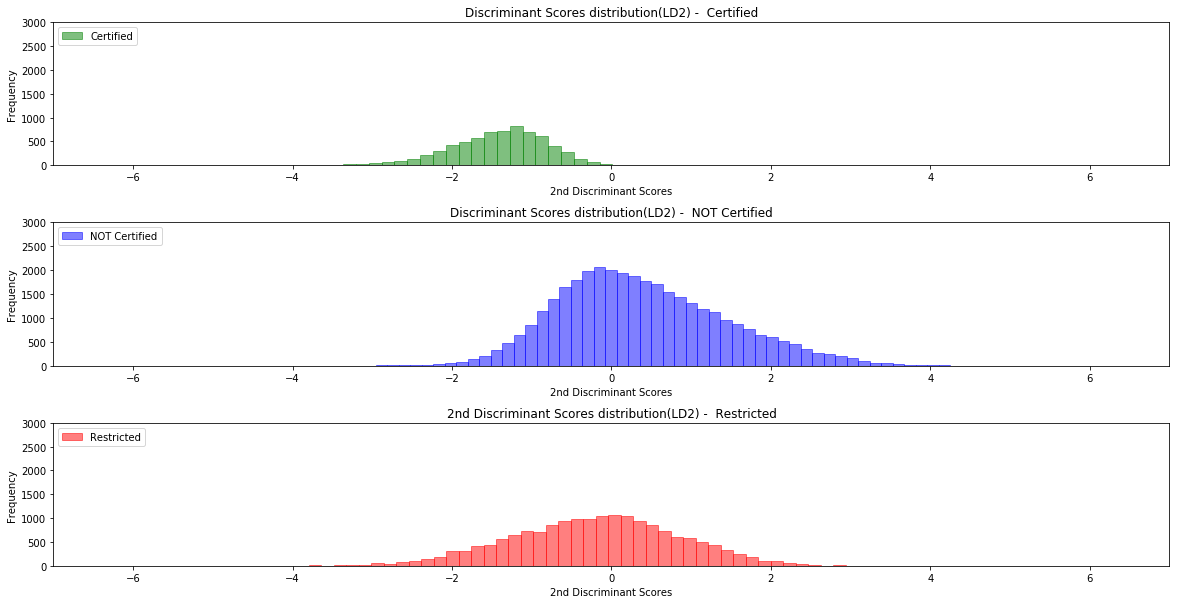

In [139]:
# Step 10d:  Visualize the distribution of Discriminant Scores of the D2 function across the data, through Histograms for the various classes of the Target  

fig = plt.figure(figsize=(20,10))
fig.subplots_adjust (hspace=0.4)

ax = fig.add_subplot (3, 1, 1)
ax.hist (np.array (vendors ['DiscScore2'] [vendors ['ResponseCode'] == 1]), bins=50, color='g',  edgecolor ='g',alpha=0.5, label='Certified')
ax.set_xlabel ('2nd Discriminant Scores')
ax.set_ylabel ('Frequency')
ax.set_xlim (-7, 7)
ax.set_ylim (0, 3000)
ax.set_title ('Discriminant Scores distribution(LD2) -  Certified')
ax.legend (loc='upper left')

ax = fig.add_subplot (3, 1, 2)
ax.hist (np.array (vendors ['DiscScore2'] [vendors ['ResponseCode'] == 0]), bins=50, color='b', edgecolor ='b', alpha=0.5, label='NOT Certified')
ax.set_xlabel ('2nd Discriminant Scores')
ax.set_ylabel ('Frequency')
ax.set_xlim (-7, 7)
ax.set_ylim (0, 3000)
ax.set_title ('Discriminant Scores distribution(LD2) -  NOT Certified')
ax.legend (loc='upper left')

ax = fig.add_subplot (3, 1, 3)
ax.hist (np.array (vendors ['DiscScore2'] [vendors ['ResponseCode'] == 2]), bins=50, color='r', edgecolor ='r', alpha=0.5, label='Restricted')
ax.set_xlabel ('2nd Discriminant Scores')
ax.set_ylabel ('Frequency')
ax.set_xlim (-7, 7)
ax.set_ylim (0, 3000)
ax.set_title ('2nd Discriminant Scores distribution(LD2) -  Restricted')
ax.legend (loc='upper left')

In [140]:
# Step 11:  Apply the (Linear) Discriminant Analysis model to segregate the data into different groups, based on the Discriminant Score  
# Step 11a:  Determine the "optimal" cut-off values of the 1st and 2nd Discriminant Scores  

zC1 = vendors ['DiscScore1'] [vendors ['ResponseCode'] == 1].mean()
zNC1 = vendors ['DiscScore1'] [vendors ['ResponseCode'] == 0].mean()
zR1 = vendors ['DiscScore1'] [vendors ['ResponseCode'] == 2].mean()
nC1 = vendors ['DiscScore1'] [vendors ['ResponseCode'] == 1].count()
nNC1 = vendors ['DiscScore1'] [vendors ['ResponseCode'] == 0].count()
nR1 = vendors ['DiscScore1'] [vendors ['ResponseCode'] == 2].count()
zcutoff1 = (zNC1*nC1 + zC1*nNC1 + zNC1*nR1 + zR1*nNC1 + zR1*nC1 + zC1*nR1) / (nNC1 + nC1 + nR1)

zC2 = vendors ['DiscScore2'] [vendors ['ResponseCode'] == 1].mean()
zNC2 = vendors ['DiscScore2'] [vendors ['ResponseCode'] == 0].mean()
zR2 = vendors ['DiscScore2'] [vendors ['ResponseCode'] == 2].mean()
nC2 = vendors ['DiscScore2'] [vendors ['ResponseCode'] == 1].count()
nNC2 = vendors ['DiscScore2'] [vendors ['ResponseCode'] == 0].count()
nR2 = vendors ['DiscScore2'] [vendors ['ResponseCode'] == 2].count()
zcutoff2 = (zNC2*nC2 + zC2*nNC2 + zNC2*nR2 + zR2*nNC2 + zR2*nC2 + zC2*nR2) / (nNC2 + nC2 + nR2)

In [141]:
# Step 11b:  Display the 2 "optimal" cut-off values for the 1st & 2nd Discriminant Scores  

print ('Avg. Discriminant Score 1 -  Certified:', zC1)
print ('Avg. Discriminant Score 1 -  NOTCertified:', zNC1)
print ('Avg. Discriminant Score 1 -  Restricted:', zR1)
print ('Number of observations 1 -  Certified:', nC1)
print ('Number of observations 1 -  NOTCertified:', nNC1)
print ('Number of observations 1 -  Restricted:', nR1)
print ('Discriminant Score cut-off1:', zcutoff1)
print ('')

print ('Avg. Discriminant Score 2 -  Certified:', zC2)
print ('Avg. Discriminant Score 2 -  NOTCertified:', zNC2)
print ('Avg. Discriminant Score 2 -  Restricted:', zR2)
print ('Number of observations 2 -  Certified:', nC2)
print ('Number of observations 2 -  NOTCertified:', nNC2)
print ('Number of observations 2 -  Restricted:', nR2)
print ('Discriminant Score cut-off2:', zcutoff2)
print ('')

Avg. Discriminant Score 1 -  Certified: -1.975003113121072
Avg. Discriminant Score 1 -  NOTCertified: -0.8049669714136262
Avg. Discriminant Score 1 -  Restricted: 2.394392545599847
Number of observations 1 -  Certified: 6906
Number of observations 1 -  NOTCertified: 35009
Number of observations 1 -  Restricted: 17466
Discriminant Score cut-off1: -0.385577538935073

Avg. Discriminant Score 2 -  Certified: -1.421676213894524
Avg. Discriminant Score 2 -  NOTCertified: 0.38300627847616153
Avg. Discriminant Score 2 -  Restricted: -0.2055748809138464
Number of observations 2 -  Certified: 6906
Number of observations 2 -  NOTCertified: 35009
Number of observations 2 -  Restricted: 17466
Discriminant Score cut-off2: -1.2442448163317898



In [142]:
# Step 11c:  Assign each sample in the data into one or the other class of the Target, based on the Discriminant Score  

vendors ['PredResponseCode'] = ''
vendors ['PredResponseCode'] = model.predict (X)
vendors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Data columns (total 11 columns):
ProductQuality         59381 non-null float64
SpeedofDelivery        59381 non-null float64
CompetitivePricing     59381 non-null float64
ComplaintResolution    59381 non-null float64
ProductLine            59381 non-null float64
NumberofComplaints     59381 non-null float64
Response               59381 non-null object
ResponseCode           59381 non-null float64
DiscScore1             59381 non-null float64
DiscScore2             59381 non-null float64
PredResponseCode       59381 non-null float64
dtypes: float64(10), object(1)
memory usage: 5.0+ MB


In [143]:
#12: Importing libraries to create the confusion matrix and compute the accuracy of our model
#12a: Creating confusion matrix 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

confusion_matrix(vendors['PredResponseCode'] , vendors['ResponseCode'] )

array([[34397,  1954,  2332],
       [  611,  4863,     0],
       [    1,    89, 15134]], dtype=int64)

In [144]:
#12b: Printing out the classification report and the Accuracy of the model
print(classification_report(vendors['PredResponseCode'] , vendors['ResponseCode']))
print('Accuracy:', accuracy_score(vendors['PredResponseCode'] , vendors['ResponseCode']))

             precision    recall  f1-score   support

        0.0       0.98      0.89      0.93     38683
        1.0       0.70      0.89      0.79      5474
        2.0       0.87      0.99      0.93     15224

avg / total       0.93      0.92      0.92     59381

Accuracy: 0.91601690776511


So we see that the accuracy of our prediction model is __91.6%__

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=5, tol=0.0001, verbose=0)

,ProductQuality,SpeedofDelivery,CompetitivePricing,ComplaintResolution,ProductLine,NumberofComplaints,Response,ResponseCode,DiscScore1,DiscScore2,PredResponseCode
0,0.641791,0.418182,0.028,0.598039,0.323008,0.076923,Certified,1.0,-2.350062,-1.693273,1.0
1,0.059701,0.400000,0.000,0.188406,0.272288,0.076923,NOTCertified,0.0,-0.699848,1.298206,0.0
2,0.029851,0.254545,0.030,0.304348,0.428780,0.076923,NOTCertified,0.0,-0.333377,2.756835,0.0
3,0.164179,0.327273,0.042,0.420290,0.352438,0.487179,Restricted,2.0,1.610147,0.506703,2.0
4,0.417910,0.345455,0.027,0.463768,0.424046,0.230769,NOTCertified,0.0,-0.662752,-0.301453,0.0


array([[0.64179104, 0.41818182, 0.028     , 0.07692308],
       [0.05970149, 0.4       , 0.        , 0.07692308],
       [0.02985075, 0.25454545, 0.03      , 0.07692308],
       ...,
       [0.10447761, 0.25454545, 0.07692308, 0.07692308],
       [0.50746269, 0.30909091, 0.23076923, 0.23076923],
       [0.44776119, 0.21818182, 0.07692308, 0.07692308]])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=5, tol=0.0001, verbose=0)

TypeError: 'LinearDiscriminantAnalysis' object is not subscriptable

,ProductQuality,SpeedofDelivery,CompetitivePricing,ComplaintResolution,ProductLine,NumberofComplaints,Response,ResponseCode,DiscScore,PredResponseCode,DiscScore1,DiscScore2
0,0.641791,0.418182,0.028,0.598039,0.323008,0.076923,Certified,1.0,-2.350062,1.0,-2.350062,-1.693273
1,0.059701,0.400000,0.000,0.188406,0.272288,0.076923,NOTCertified,0.0,-0.699848,0.0,-0.699848,1.298206
2,0.029851,0.254545,0.030,0.304348,0.428780,0.076923,NOTCertified,0.0,-0.333377,0.0,-0.333377,2.756835
3,0.164179,0.327273,0.042,0.420290,0.352438,0.487179,Restricted,2.0,1.610147,2.0,1.610147,0.506703
4,0.417910,0.345455,0.027,0.463768,0.424046,0.230769,NOTCertified,0.0,-0.662752,0.0,-0.662752,-0.301453
